In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sys
from sklearn.model_selection import train_test_split 

In [3]:
df = pd.read_csv('customer_purchase_data.csv')

In [4]:
df.shape

(1500, 9)

In [5]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [7]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [7]:
df.columns

Index(['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'PurchaseStatus'],
      dtype='object')

In [8]:
features = ['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory', 'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed']

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'AnnualIncome'}>],
       [<Axes: title={'center': 'NumberOfPurchases'}>,
        <Axes: title={'center': 'ProductCategory'}>,
        <Axes: title={'center': 'TimeSpentOnWebsite'}>],
       [<Axes: title={'center': 'LoyaltyProgram'}>,
        <Axes: title={'center': 'DiscountsAvailed'}>, <Axes: >]],
      dtype=object)

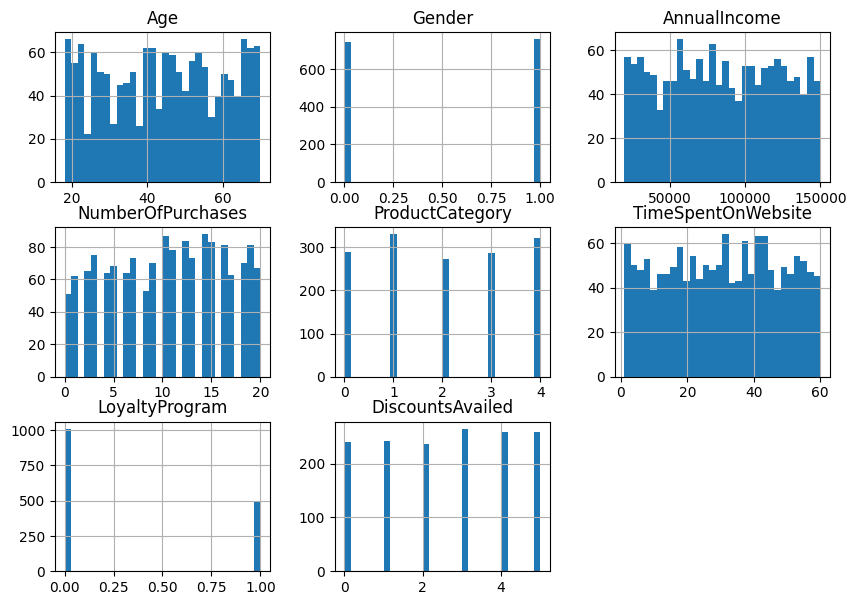

In [9]:
df[features].hist(bins=30, figsize=(10, 7))

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'AnnualIncome'}>],
       [<Axes: title={'center': 'NumberOfPurchases'}>,
        <Axes: title={'center': 'ProductCategory'}>,
        <Axes: title={'center': 'TimeSpentOnWebsite'}>],
       [<Axes: title={'center': 'LoyaltyProgram'}>,
        <Axes: title={'center': 'DiscountsAvailed'}>, <Axes: >]],
      dtype=object)

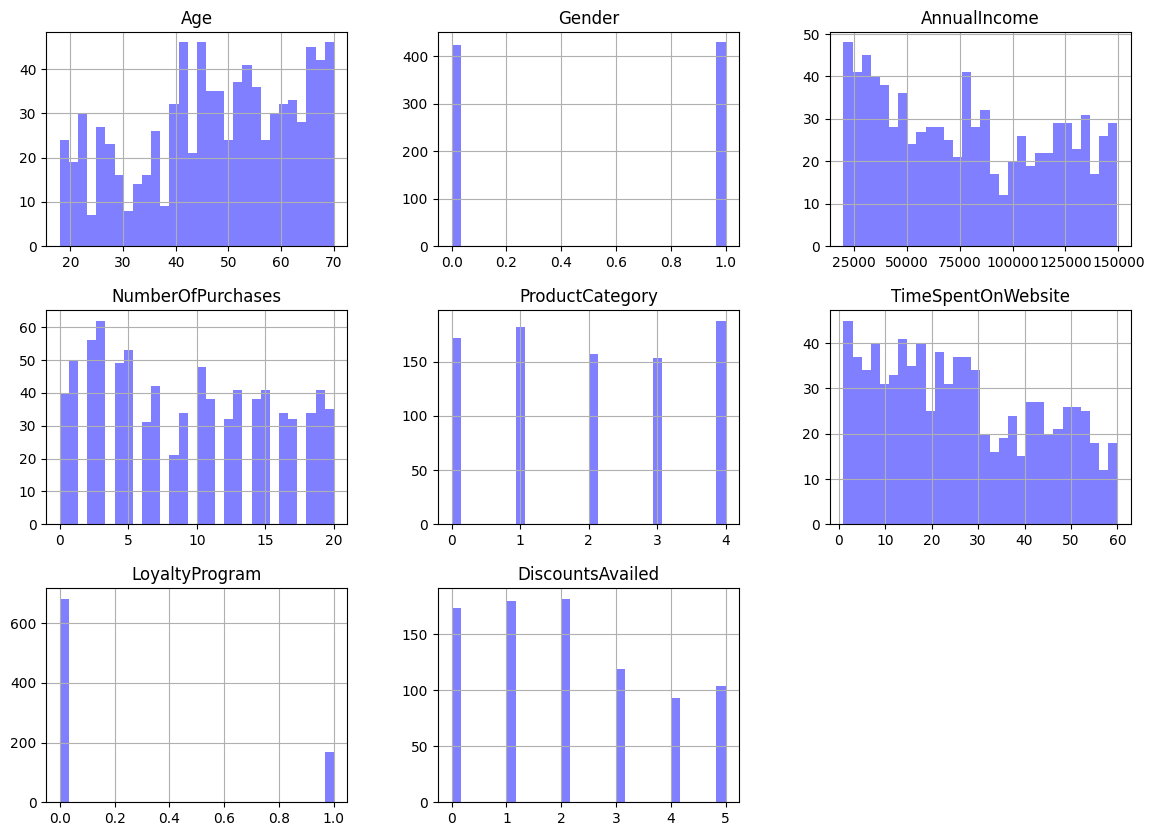

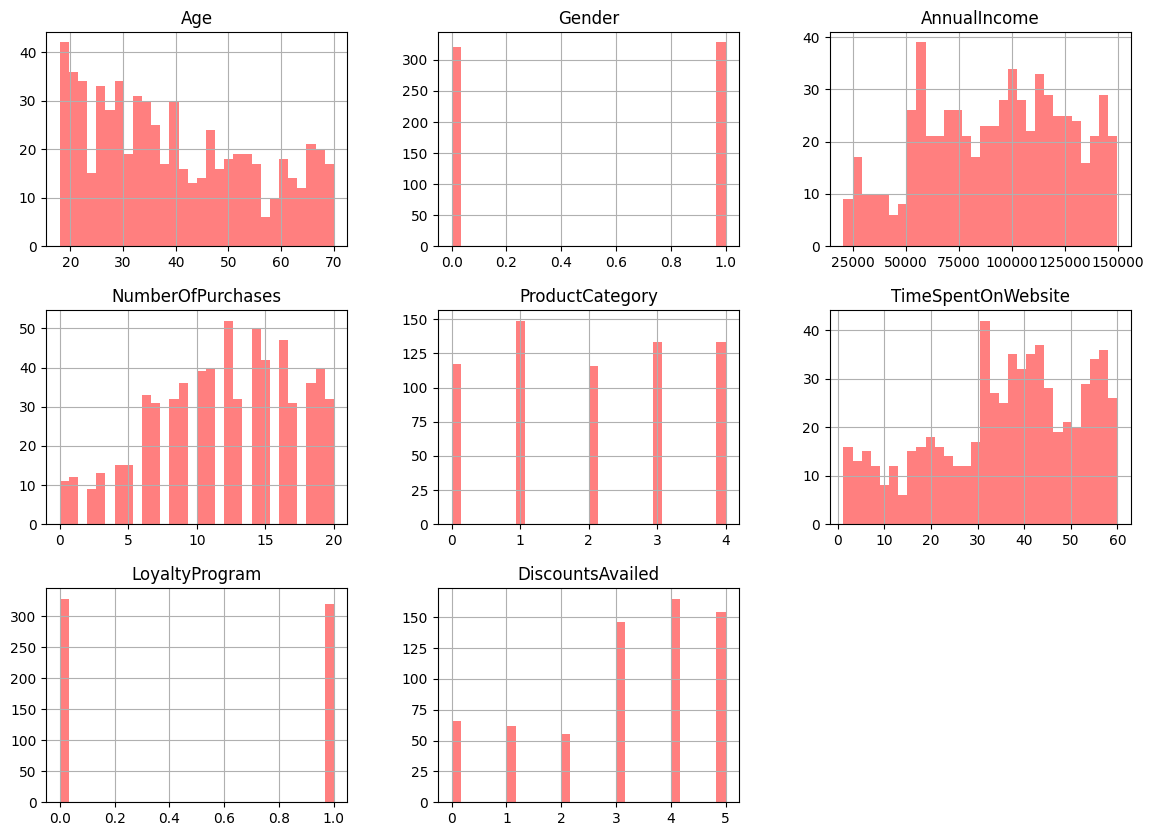

In [20]:
df[df.PurchaseStatus==0][features].hist(bins=30, color='blue', alpha=0.5, figsize=(14, 10))
df[df.PurchaseStatus==1][features].hist(bins=30, color='red', alpha=0.5, figsize=(14, 10))

<Axes: >

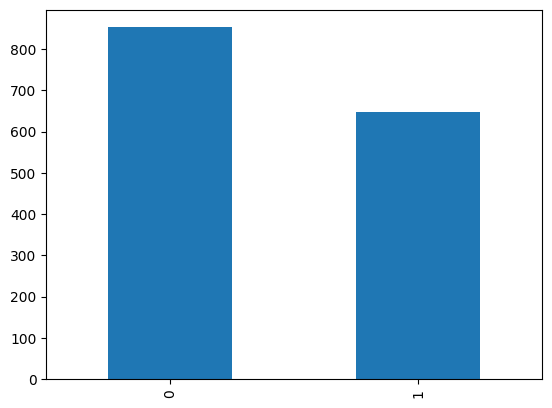

In [21]:
df['PurchaseStatus'].value_counts().plot(kind='bar')

In [22]:
df.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

In [28]:
X = df.drop(['PurchaseStatus'], axis=1)
X.shape

(1500, 8)

In [32]:
y = df['PurchaseStatus']
y.shape

(1500,)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1200, 8)
(300, 8)
(1200,)
(300,)


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [36]:
scaler.fit(X_train)

StandardScaler()

In [37]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [43]:
np.round(X_train.describe(), 1)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed
count,1200.0,1200.0,1200.0,1200.0,1200.0,1200.0,1200.0,1200.0
mean,44.5,0.5,83499.6,10.4,2.0,30.4,0.3,2.6
std,15.7,0.5,37733.6,6.0,1.4,17.0,0.5,1.7
min,18.0,0.0,20001.5,0.0,0.0,1.0,0.0,0.0
25%,31.0,0.0,52175.6,5.0,1.0,16.2,0.0,1.0
50%,45.0,1.0,82819.1,11.0,2.0,30.7,0.0,3.0
75%,58.0,1.0,116072.4,15.0,3.0,44.4,1.0,4.0
max,70.0,1.0,149785.2,20.0,4.0,60.0,1.0,5.0


In [44]:
np.round(X_train_scaled.describe(), 1)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed
count,1200.0,1200.0,1200.0,1200.0,1200.0,1200.0,1200.0,1200.0
mean,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.7,-1.0,-1.7,-1.7,-1.4,-1.7,-0.7,-1.5
25%,-0.9,-1.0,-0.8,-0.9,-0.7,-0.8,-0.7,-0.9
50%,0.0,1.0,-0.0,0.1,-0.0,0.0,-0.7,0.3
75%,0.9,1.0,0.9,0.8,0.7,0.8,1.4,0.8
max,1.6,1.0,1.8,1.6,1.4,1.7,1.4,1.4


In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr_scaled = LogisticRegression()

In [47]:
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [48]:
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
print("Accuracy",accuracy_score(y_test,y_pred_scaled))

Accuracy 0.8233333333333334
